In [1]:
from goes2go.data import goes_nearesttime
from datetime import datetime, timedelta
import cartopy.crs as ccrs

lat_bottom, lat_top = 33.5, 34.5
lon_bottom, lon_top = -118.75, -117.0
la_extent = (lon_bottom, lon_top, lat_bottom, lat_top)

In [2]:
ds = goes_nearesttime(
    datetime(2022, 12, 25, 19), # high noon christmas pst
    satellite="goes18",
    product="ABI-L2-AODC",
    return_as="xarray", 
    verbose=False
)

crs_geo = ds.FOV.crs
crs_pc = ccrs.PlateCarree()

h = ds['goes_imager_projection'].attrs['perspective_point_height']
ds.coords['x'] = ds.coords['x'] * h
ds.coords['y'] = ds.coords['y'] * h

📦 Finished downloading [1] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].


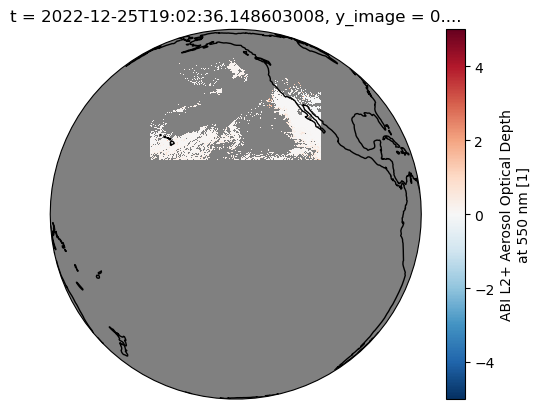

In [3]:
# global
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.set_global()
p.axes.coastlines();

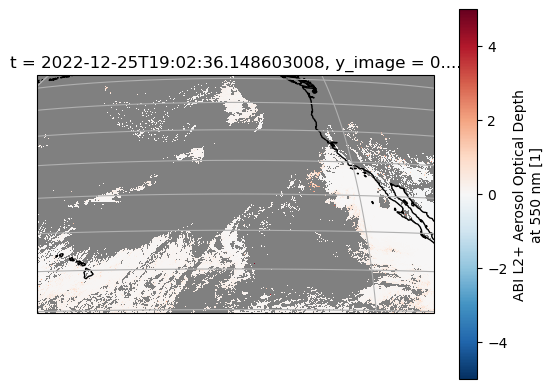

In [4]:
# with satellite's extent
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.gridlines(crs=crs_pc)
p.axes.coastlines();

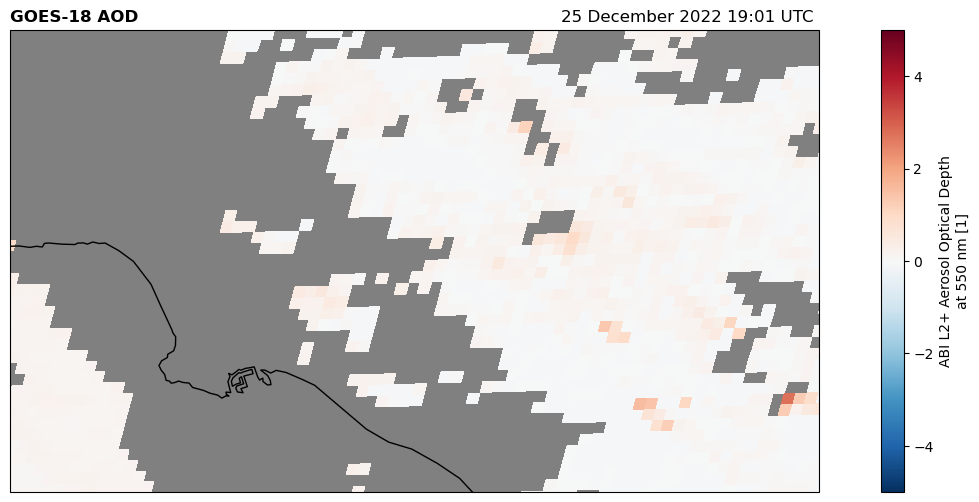

In [5]:
# LA extent
scan_start = datetime.strptime(str(ds.time_coverage_start.values), '%Y-%m-%dT%H:%M:%S.%fZ')
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6)
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD', fontweight='bold', loc='left')
p.axes.set_title(scan_start.strftime('%d %B %Y %H:%M UTC '), loc='right')
p.axes.coastlines()
p.axes.set_extent(extents=la_extent, crs=crs_pc);

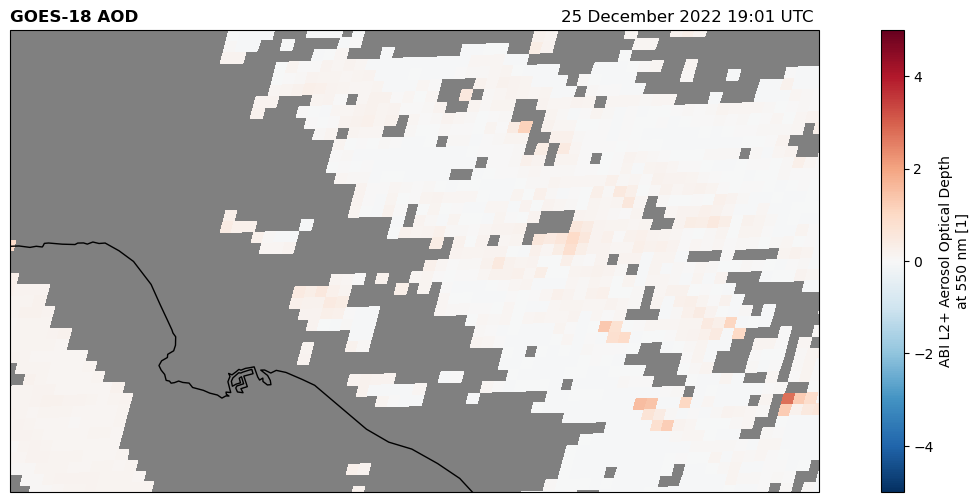

In [6]:
# LA extent -- quality >= 1
p = ds['AOD'].where(ds['DQF'] > 0).plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6),
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD', fontweight='bold', loc='left')
p.axes.set_title(scan_start.strftime('%d %B %Y %H:%M UTC '), loc='right')
p.axes.coastlines()
p.axes.set_extent(extents=la_extent, crs=crs_pc);

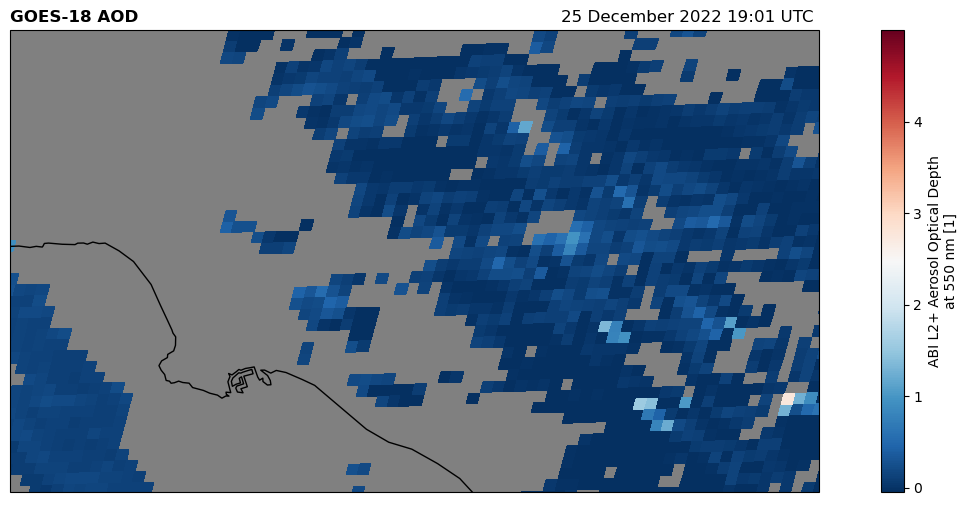

In [7]:
# LA extent -- quality >= 1, better colormap
p = ds['AOD'].where(ds['DQF'] > 0).plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6),
    vmin=float(ds['AOD'].min()),
    vmax=float(ds['AOD'].max()),
    cmap='RdBu_r'
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD', fontweight='bold', loc='left')
p.axes.set_title(scan_start.strftime('%d %B %Y %H:%M UTC '), loc='right')
p.axes.coastlines()
p.axes.set_extent(extents=la_extent, crs=crs_pc);